# Machine Learning-regression 

### 基本package

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

### 训练用package

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### 设置字体

In [43]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

### 加载数据

In [4]:
path1 = './datas/household_power_consumption_1000.txt'
df = pd.read_csv(path1, sep=';',low_memory=False)

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
995,17/12/2006,09:59:00,2.296,0.054,238.13,9.6,0.0,0.0,0.0
996,17/12/2006,10:00:00,2.292,0.054,238.03,9.6,0.0,0.0,0.0
997,17/12/2006,10:01:00,0.370,0.000,240.26,2.4,0.0,0.0,0.0
998,17/12/2006,10:02:00,0.472,0.000,240.15,2.4,0.0,0.0,0.0
999,17/12/2006,10:03:00,3.054,0.060,237.55,13.4,0.0,0.0,18.0


In [7]:
df.shape

(1000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


In [9]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1000.0,2.418772,1.239979,0.206,1.806,2.414,3.308,7.706
Global_reactive_power,1000.0,0.089232,0.088088,0.000,0.000,0.072,0.126,0.528
Voltage,1000.0,240.035790,4.084420,230.980,236.940,240.650,243.295,249.370
Global_intensity,1000.0,10.351000,5.122214,0.800,8.400,10.000,14.000,33.200
Sub_metering_1,1000.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
Sub_metering_2,1000.0,2.749000,8.104053,0.000,0.000,0.000,1.000,38.000
Sub_metering_3,1000.0,5.756000,8.066941,0.000,0.000,0.000,17.000,19.000


### 处理异常值

In [11]:
#非法字符替代为np.nan
new_df = df.replace('?',np.nan)
#去掉有缺失值的行
datas = new_df.dropna(axis=0,how='any')

### 时间特征处理

In [12]:
def data_format(dt):
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S')
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)


In [13]:
X = datas.iloc[:,0:2]
X.head()

,Date,Time
0,16/12/2006,17:24:00
1,16/12/2006,17:25:00
2,16/12/2006,17:26:00
3,16/12/2006,17:27:00
4,16/12/2006,17:28:00


In [14]:
X = X.apply(lambda x: pd.Series(data_format(x)),axis = 1)
X.head()

,0,1,2,3,4,5
0,2006,12,16,17,24,0
1,2006,12,16,17,25,0
2,2006,12,16,17,26,0
3,2006,12,16,17,27,0
4,2006,12,16,17,28,0


In [15]:
Y = datas['Global_active_power']

In [16]:
Y.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64

### 划分训练集和测试集

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [18]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2 ,random_state = 10)

In [19]:
X.shape

(1000, 6)

In [20]:
X_train.shape

(800, 6)

In [21]:
X_test.shape

(200, 6)

In [22]:
Y_train.shape

(800,)

In [23]:
X_train.describe()

,0,1,2,3,4,5
count,800.0,800.0,800.000000,800.000000,800.000000,800.0
mean,2006.0,12.0,16.601250,10.763750,29.817500,0.0
std,0.0,0.0,0.489947,8.063604,17.379348,0.0
min,2006.0,12.0,16.000000,0.000000,0.000000,0.0
25%,2006.0,12.0,16.000000,4.000000,15.000000,0.0
50%,2006.0,12.0,17.000000,8.000000,31.000000,0.0
75%,2006.0,12.0,17.000000,19.000000,45.000000,0.0
max,2006.0,12.0,17.000000,23.000000,59.000000,0.0


In [24]:
X_test.describe()

,0,1,2,3,4,5
count,200.0,200.0,200.000000,200.000000,200.00000,200.0
mean,2006.0,12.0,16.615000,10.605000,29.83000,0.0
std,0.0,0.0,0.487816,8.117168,17.17428,0.0
min,2006.0,12.0,16.000000,0.000000,0.00000,0.0
25%,2006.0,12.0,16.000000,4.000000,15.75000,0.0
50%,2006.0,12.0,17.000000,8.000000,28.00000,0.0
75%,2006.0,12.0,17.000000,19.250000,45.00000,0.0
max,2006.0,12.0,17.000000,23.000000,59.00000,0.0


### 标准化

In [25]:
ss = StandardScaler()

#县拟合设定范围，在转换测试集
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [26]:
X_train

array([[ 0.        ,  0.        , -1.22794014,  1.14614108,  0.12565864,
         0.        ],
       [ 0.        ,  0.        , -1.22794014,  1.14614108,  0.47111196,
         0.        ],
       [ 0.        ,  0.        , -1.22794014,  1.27023269, -1.19857907,
         0.        ],
       ...,
       [ 0.        ,  0.        ,  0.81437194, -0.09477496, -1.71675905,
         0.        ],
       [ 0.        ,  0.        , -1.22794014,  1.02204948, -0.04706801,
         0.        ],
       [ 0.        ,  0.        , -1.22794014,  1.27023269,  1.10444305,
         0.        ]])

# 线性回归

In [27]:
#有截距
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_predict = lr.predict(X_test)

In [29]:
y_predict

array([1.67067282, 1.43058595, 2.30091676, 3.12370568, 1.86815363,
       1.43374665, 3.22636522, 3.00524259, 3.45064856, 3.22952593,
       2.06082988, 2.57261073, 3.06681292, 1.46851445, 2.6166024 ,
       2.57893214, 1.65802999, 1.69431464, 1.82706442, 2.67349516,
       1.34840751, 2.9183866 , 3.16947246, 3.0431711 , 2.47778946,
       3.43484501, 3.02736756, 1.47635273, 3.1300271 , 1.53324549,
       2.65137019, 2.25198927, 2.75402973, 2.15400729, 2.57577144,
       2.78879753, 2.73822619, 1.36105035, 2.62318207, 1.48115729,
       2.75251288, 1.71011819, 1.43842422, 2.23618572, 2.4904323 ,
       1.57749541, 1.36737177, 1.59962037, 2.3167203 , 1.44006807,
       3.40007721, 3.34482831, 2.82988675, 2.49991442, 2.88677951,
       3.19475813, 2.45730835, 2.51571797, 2.17297155, 3.41588076,
       2.09243697, 1.47799658, 1.32944326, 1.43526351, 2.04818704,
       1.49380012, 2.36097023, 1.57269085, 1.72276102, 2.58525356,
       2.63240594, 2.67033445, 2.43518339, 3.0604915 , 1.90127

# 拟合效果

In [30]:
#R2，训练集
lr.score(X_train,Y_train)

0.26123286585948235

In [31]:
lr.score(X_test,Y_test)

0.06452356349948052

In [32]:
#MSE
mse = np.average((y_predict - Y_test)**2)
mse

1.577069855824801

In [33]:
rmse = np.sqrt(mse)
rmse

1.2558144193410112

# 系数和截距

In [34]:
lr.coef_

array([ 0.00000000e+00,  6.66133815e-16, -1.51349784e+00, -1.03105454e+00,
       -5.48967182e-02,  0.00000000e+00])

In [35]:
lr.intercept_

2.406442499999999

# 固话

In [36]:
from sklearn.externals import joblib

#保存模型
joblib.dump(ss,'result/data_ss.model')

['result/data_ss.model']

In [37]:
#保存回归模型
joblib.dump(lr,'result/data_lr.model')

['result/data_lr.model']

# 加载

In [38]:
ss3 = joblib.load('result/data_ss.model')
lr3 = joblib.load('result/data_lr.model')

In [39]:
#仿造数据
data1 = [[2006,12,17,12,25,0]]
data1 = ss3.transform(data1)
data1

array([[ 0.        ,  0.        ,  0.81437194,  0.15340825, -0.27737023,
         0.        ]])

In [40]:
#查看回归预测结果
lr3.predict(data1)

array([1.03094676])

# 画图

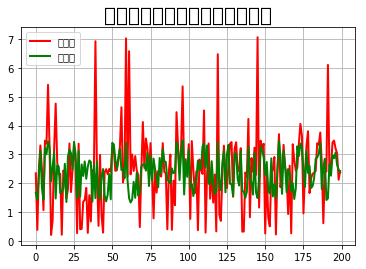

In [59]:
#时间轴 作为横坐标
t = np.arange(len(X_test))

#绘制
plt.figure(facecolor='w') # 指定画布背景为白色
plt.plot(t,Y_test,'r-',linewidth=2,label='真实值')
plt.plot(t,y_predict,'g-',linewidth=2,label='预测值')
plt.legend(loc='upper left')
plt.title('线性回归预测时间和功率的关系',fontsize=20)
plt.grid(True)
plt.show()